In [1]:
import pandas as pd
import numpy as np

# Random Seed
# classification
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')
df.shape

(41188, 21)

In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.isnull().sum()
# There are no missing values in the data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
# check the shape of the data
df.info()
# ================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(df['y'].value_counts())
# Firstly, column y is treated as 0, 1 by treating whether people will buy time deposits or not
df['y']=df['y'].map({'yes':1,'no':0})
# ================================

y
no     36548
yes     4640
Name: count, dtype: int64


In [6]:
print(df['job'].value_counts())
# After entering the results, it was found that there were more values in the work, but two less data, 
# so frequency coding was chosen
job_freq = df['job'].value_counts()/len(df)
df['job']=df['job'].map(job_freq)
# ================================

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


In [7]:
print(df['marital'].value_counts())
# It was found that there are four values in marital and the percentage of unknown is small,
# and there is no order relationship so the frequency code was chosen.
marital_freq = df['marital'].value_counts() / len(df)
df['marital'] = df['marital'].map(marital_freq)
# ================================

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


In [8]:
print(df['education'].value_counts())
# A sequential relationship was found to exist for EDUCATION, so label coding was used
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
                   'high.school', 'professional.course', 'university.degree', 'unknown']
df['education']=df['education'].apply(lambda x: education_order.index(x))
# ================================

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


In [9]:
print(df['education'].value_counts())

education
6    12168
4     9515
3     6045
5     5243
1     4176
2     2292
7     1731
0       18
Name: count, dtype: int64


In [10]:
print(df['default'].value_counts())
# This column was found to have a small target term, 
# but YES the target was very small, so the target coding was easily overfitted, 
# so frequency coding was used
default_freq = df['default'].value_counts()/len(df)
df['default']=df['default'].map(default_freq)
# ================================

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


In [11]:
print(df['housing'].value_counts())
# Appears UNKNOWN and the number is small so it is adopted, so use the target code
target_housing=df.groupby('housing')['y'].mean()
df['housing']=df['housing'].map(target_housing)
# ================================

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


In [12]:
print(df['loan'].value_counts())
# same with housing, use the target code
target_loan=df.groupby('loan')['y'].mean()
df['loan']=df['loan'].map(target_loan)
# ================================

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


In [13]:
print(df['contact'].value_counts())
# Smaller quantities, frequency coded
contact_freq = df['contact'].value_counts()/len(df)
df['contact']=df['contact'].map(contact_freq)
# ================================

contact
cellular     26144
telephone    15044
Name: count, dtype: int64


In [14]:
print(df['month'].value_counts())
month_freq=df['month'].value_counts()/len(df)
df['month']=df['month'].map(month_freq)
# ================================

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


In [15]:
print(df['day_of_week'].value_counts())
#same with month, use the frequency code
week_freq=df['day_of_week'].value_counts()/len(df)
df['day_of_week']=df['day_of_week'].map(week_freq)
# ================================

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


In [16]:
print(df['poutcome'].value_counts())
# Relationships may exist with whether or not they will be purchased on a regular basis, 
# so target coding is used
target_poutcome=df.groupby('poutcome')['y'].mean()
df['poutcome']=df['poutcome'].map(target_poutcome)
# ================================

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  int64  
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025736,0.605225,1,0.791201,0.108796,0.113402,0.365252,0.334296,0.206711,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.096363,0.605225,4,0.208726,0.108796,0.113402,0.365252,0.334296,0.206711,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.096363,0.605225,4,0.791201,0.116194,0.113402,0.365252,0.334296,0.206711,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.253035,0.605225,2,0.791201,0.108796,0.113402,0.365252,0.334296,0.206711,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.096363,0.605225,4,0.791201,0.108796,0.109315,0.365252,0.334296,0.206711,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041760,0.605225,5,0.791201,0.116194,0.113402,0.634748,0.099568,0.190031,...,1,999,0,0.088322,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0.224677,0.605225,5,0.791201,0.108796,0.113402,0.634748,0.099568,0.190031,...,1,999,0,0.088322,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0.041760,0.605225,6,0.791201,0.116194,0.113402,0.634748,0.099568,0.190031,...,2,999,0,0.088322,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0.163713,0.605225,5,0.791201,0.108796,0.113402,0.634748,0.099568,0.190031,...,1,999,0,0.088322,-1.1,94.767,-50.8,1.028,4963.6,1


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['y'])  
y = df['y']
# Initial testing revealed that the model was accurate, 
# but F1, the precision was very low, so the model was SMOTE to balance the data

smote = SMOTE(random_state=42, sampling_strategy=0.6)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
# ================================

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)
# ================================

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) 
model_rf.fit(X_train, y_train)
train_score = model_rf.score(X_train, y_train)
test_score = model_rf.score(X_test, y_test)
print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
# ================================

Training Score: 1.0000
Test Score: 0.9415


Random Forest Model Accuracy:, 0.9415
Random Forest Model Precision: 0.9241
Random Forest Model Recall: 0.9216
Random Forest Model F1 Score: 0.9228
Random Forest Confusion Matrix:
 [[8652  420]
 [ 435 5112]]


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

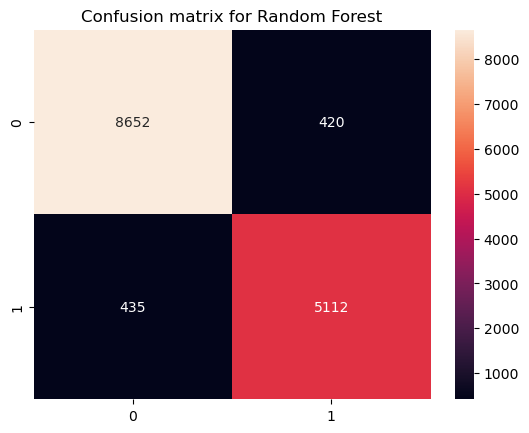

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
y_pred_rf = model_rf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_rf)

precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest Model Accuracy:, {accuracy:.4f}")
print(f"Random Forest Model Precision: {precision:.4f}")
print(f"Random Forest Model Recall: {recall:.4f}")
print(f"Random Forest Model F1 Score: {f1:.4f}")

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d").set_title("Confusion matrix for Random Forest")
# ================================

Logistic Regression Model Accuracy:, 0.8580
Logistic Regression Model Precision: 0.8291
Logistic Regression Model Recall: 0.7882
Logistic Regression Model F1 Score: 0.8081
Logistic Regression Confusion Matrix:
 [[8171  901]
 [1175 4372]]


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

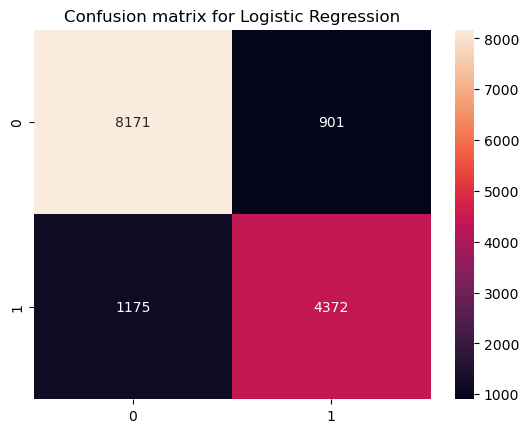

In [23]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model, set the maximum number of iterations to 10000
model_lr = LogisticRegression(max_iter=10000, C=1, solver='lbfgs')
model_lr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
# Predict the test set results
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
# Print the accuracy, precision, recall, and F1 score
print(f"Logistic Regression Model Accuracy:, {accuracy:.4f}")
print(f"Logistic Regression Model Precision: {precision:.4f}")
print(f"Logistic Regression Model Recall: {recall:.4f}")
print(f"Logistic Regression Model F1 Score: {f1:.4f}")
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d").set_title("Confusion matrix for Logistic Regression")
# ================================

In [24]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=0)
model_MLP.fit(X_train, y_train)
train_score = model_MLP.score(X_train, y_train)
test_score = model_MLP.score(X_test, y_test)
print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
# ================================

Training Score: 0.9710
Test Score: 0.9230


Neural Network Model Accuracy:, 0.9230
Neural Network Model Precision: 0.8926
Neural Network Model Recall: 0.9063
Neural Network Model F1 Score: 0.8994
Neural Network Confusion Matrix:
 [[8467  605]
 [ 520 5027]]


Text(0.5, 1.0, 'Confusion matrix for Neural Network')

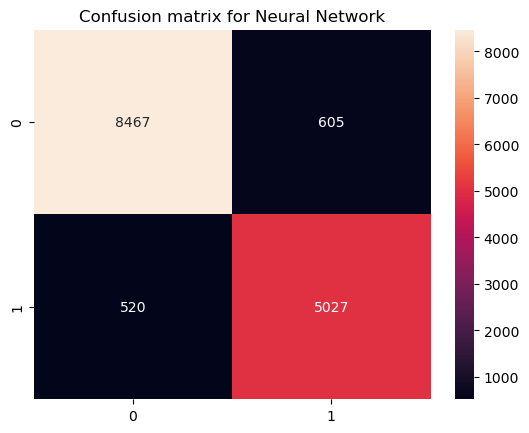

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_MLP = model_MLP.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_MLP)

precision = precision_score(y_test, y_pred_MLP)
recall = recall_score(y_test, y_pred_MLP)
f1 = f1_score(y_test, y_pred_MLP)

print(f"Neural Network Model Accuracy:, {accuracy:.4f}")
print(f"Neural Network Model Precision: {precision:.4f}")
print(f"Neural Network Model Recall: {recall:.4f}")
print(f"Neural Network Model F1 Score: {f1:.4f}")
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_MLP)
print("Neural Network Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d").set_title("Confusion matrix for Neural Network")
# ================================

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# SVM with GridSearchCV
model_svm = SVC(kernel='linear', C=5.0, random_state=0)
# Test the value of C by setting it to a high and low value to get the best accuracy
model_svm.fit(X_train, y_train)
# ================================

SVC(C=5.0, kernel='linear', random_state=0)

SVM Model Accuracy:, 0.8633
SVM Model Precision: 0.8197
SVM Model Recall: 0.8203
SVM Model F1 Score: 0.8200
SVM Confusion Matrix:
 [[8071 1001]
 [ 997 4550]]


Text(0.5, 1.0, 'Confusion matrix for SVM')

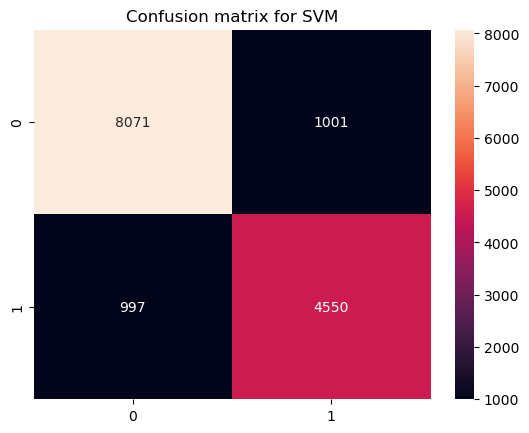

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model_svm.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"SVM Model Accuracy:, {accuracy:.4f}")
print(f"SVM Model Precision: {precision:.4f}")
print(f"SVM Model Recall: {recall:.4f}")
print(f"SVM Model F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d").set_title("Confusion matrix for SVM")
# ================================

In [28]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
# Define parameter space
param_dist = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance']
    }
model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_knn,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42
)
# Perform random search
random_search.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Make predictions with the best model
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

Best parameters found: {'weights': 'uniform', 'n_neighbors': 1}
Best cross-validation score: 0.916113765241058


KNN Model Accuracy:, 0.9276
KNN Model Precision: 0.8811
KNN Model Recall: 0.9353
KNN Model F1 Score: 0.9074
SVM Confusion Matrix:
 [[8372  700]
 [ 359 5188]]


Text(0.5, 1.0, 'Confusion matrix for KNN')

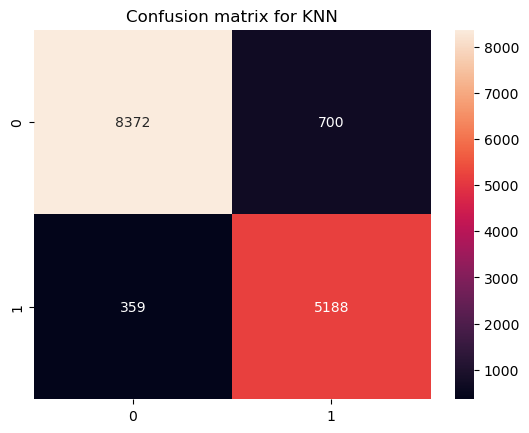

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy=accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN Model Accuracy:, {accuracy:.4f}")
print(f"KNN Model Precision: {precision:.4f}")
print(f"KNN Model Recall: {recall:.4f}")
print(f"KNN Model F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d").set_title("Confusion matrix for KNN")

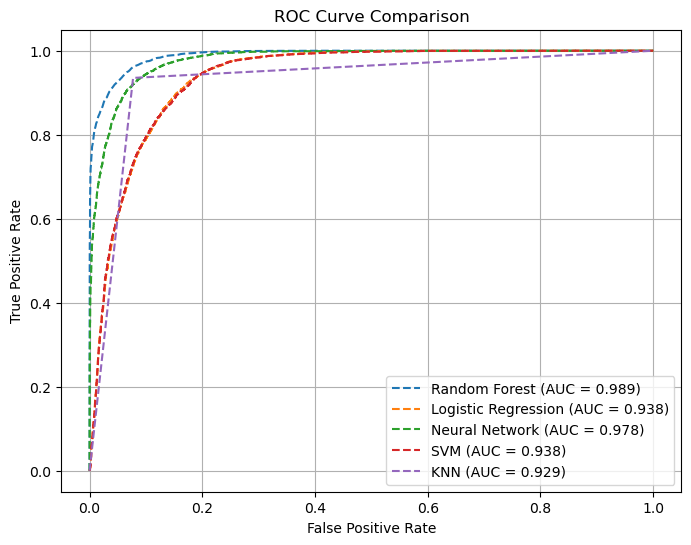

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for RandomForest
rf_probs = model_rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# ROC Curve for Logistic Regression
lr_probs = model_lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# ROC Curve for Neural Network
mlp_probs = model_MLP.predict_proba(X_test)[:, 1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

# ROC Curve for SVM
svm_probs = model_svm.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# ROC Curve for KNN
knn_probs = best_knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Plotting all the ROC curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label=f'Neural Network (AUC = {mlp_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, linestyle='--', label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot(knn_fpr, knn_tpr, linestyle='--', label=f'KNN (AUC = {knn_auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()

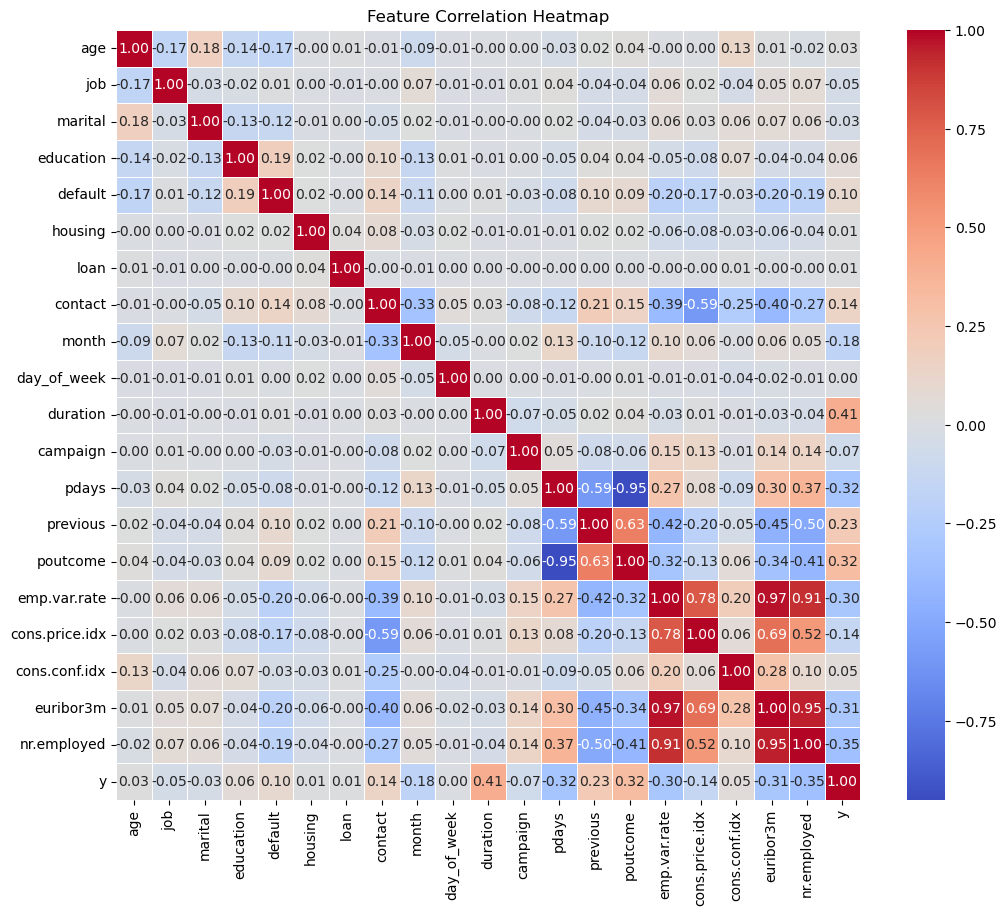

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()